In [1]:
#webscraping and analyzing
#Import pandas to convert list to data frame

import pandas as pd
import numpy as np

In [2]:
import urllib.request

#import the beatiful soup functions to parse the data
from bs4 import BeautifulSoup

In [3]:
url = "http://gbsnote.com/slc-result-history-nepal/"

In [4]:
#query the website
page = urllib.request.urlopen(url)

In [5]:
#parse the html and store in Beautiful soup format
soup = BeautifulSoup(page)

In [6]:
#see HTML page nested structure
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en-US" prefix="og: http://ogp.me/ns#">
 <!--<![endif]-->
 <head>
  <title>
   SLC Result History, SLC Result History in Nepal - GBS NOTE
  </title>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="http://gbsnote.com/xmlrpc.php" rel="pingback"/>
  <meta content="http://gbsnote.com/wp-content/uploads/slc-history-.jpg" property="og:image"/>
  <!-- This site is optimized with the Yoast SEO plugin v10.1.3 - https://yoast.com/wordpress/plugins/seo/ -->
  <meta content="Here is the SLC result history in Nepal. The slc result history is given here since 1990 BS. So you can find the data of slc result from 1990 BS." name="description"/>
  <link href="http://gbsnote.com/slc-result-history-nepal/" rel="canonical"/>
  <meta content="en_US" property="og:locale"/>
  <

In [7]:
soup.title.string

'SLC Result History, SLC Result History in Nepal - GBS NOTE'

In [8]:
soup.a

<a href="#"><i class="td-icon-close-mobile"></i></a>

In [9]:
#find all links

all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

#
http://gbsnote.com/category/news/
http://gbsnote.com/category/jobs/
http://gbsnote.com/category/abroad-study/
http://gbsnote.com/category/abroad-study/australia/
http://gbsnote.com/category/abroad-study/usa/
http://gbsnote.com/category/exam-routine/
http://gbsnote.com/category/exam-routine/slc-routine/
http://gbsnote.com/category/exam-routine/hseb-11-routine/
http://gbsnote.com/category/exam-routine/hseb-12-routine/
http://gbsnote.com/category/exam-routine/tu-routine/
http://gbsnote.com/category/exam-routine/ku-routine/
http://gbsnote.com/category/exam-routine/ku-routine-exam-routine/
http://gbsnote.com/category/result/
http://gbsnote.com/category/result/slc-result/
http://gbsnote.com/category/result/hseb-11-result/
http://gbsnote.com/category/result/hseb-12-result/
http://gbsnote.com/category/result/tu-result/
http://gbsnote.com/category/result/ku-result/
http://gbsnote.com/category/result/ku-result-result/
http://gbsnote.com/category/entrance-guide/
http://gbsnote.com/category/eps-

In [10]:
#find all tables
all_tables = soup.find('table')
print(all_tables)

<table width="460">
<tbody>
<tr>
<td colspan="4" style="text-align: center;" width="460"><strong>                    <a href="http://gbsnote.com/see-exam-result-2073/" rel="noopener noreferrer" target="_blank">SLC RESULT AT A GLANCE</a></strong></td>
</tr>
<tr>
<td width="79"><strong>Year (BS)</strong></td>
<td width="133"><strong>Total Appeared</strong></td>
<td width="109"><strong>Total Passed</strong></td>
<td width="139"><strong>Pass Percentage</strong></td>
</tr>
<tr>
<td width="79">1990</td>
<td width="133">33</td>
<td width="109">19</td>
<td width="139">57.58%</td>
</tr>
<tr>
<td width="79">1991</td>
<td width="133">26</td>
<td width="109">15</td>
<td width="139">57.69%</td>
</tr>
<tr>
<td width="79">1992</td>
<td width="133">35</td>
<td width="109">24</td>
<td width="139">68.57%</td>
</tr>
<tr>
<td width="79">1993</td>
<td width="133">36</td>
<td width="109">22</td>
<td width="139">61.11%</td>
</tr>
<tr>
<td width="79">1994</td>
<td width="133">50</td>
<td width="109">36</td>
<

In [11]:
#Generate lists

A = []
B = []
C = []
D = []

for row in all_tables.findAll("tr"):
    cells = row.findAll('td')
    
    #Only extract table body
    if(len(cells) == 4):
        A.append(cells[0].find(text = True))
        B.append(cells[1].find(text = True))
        C.append(cells[2].find(text = True))
        D.append(cells[3].find(text = True))

In [12]:
df = pd.DataFrame()

df['Year(BS)'] = A
df['Total Appeared'] = B
df['Total Passed'] = C
df['Pass Percentage'] = D


In [13]:
truedf = df[1:]
truedf['Pass Percentage'] = truedf['Pass Percentage'].str.replace('%', '')
truedf['Year(BS)'] = truedf['Year(BS)'].str.replace('\n', '0')

/home/milan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/milan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
truedf.to_csv('slc.csv', encoding='utf-8', index=False)

In [15]:
#Data Analyzing starts

In [16]:
#Read in data
features = pd.read_csv('slc.csv')

In [17]:
#features['Pass Percentage'] = features['Pass Percentage'].astype(int)

In [18]:
#features['Year(BS)']=features['Year(BS)'].apply(lambda x: np.where(x.isdigit(),x,'NaN'))

In [19]:
type(features['Year(BS)'])

pandas.core.series.Series

In [20]:
features.mean()

Year(BS)            1979.981818
Total Appeared     18425.963636
Total Passed        5268.909091
Pass Percentage       43.234909
dtype: float64

In [21]:
#Replacing zero value of year
past = 0
value = 0
for value in (features['Year(BS)']):
    #print(past)
    if(value != 0):
        past = value
    else:
        nextval = past+1
        features.replace(value,nextval)
        break
print(nextval)

2036


In [22]:
finalfea = features.replace(value,nextval)

In [23]:
finalfea.to_csv('slcfinal.csv', encoding='utf-8', index=False)

In [24]:
finalfea.head()

,Year(BS),Total Appeared,Total Passed,Pass Percentage
0,1990,33,19,57.58
1,1991,26,15,57.69
2,1992,35,24,68.57
3,1993,36,22,61.11
4,1994,50,36,72.00


In [25]:
finalfea.describe()

,Year(BS),Total Appeared,Total Passed,Pass Percentage
count,55.00000,55.000000,55.000000,55.000000
mean,2017.00000,18425.963636,5268.909091,43.234909
std,16.02082,27875.566485,7224.952580,15.463206
min,1990.00000,26.000000,15.000000,16.680000
25%,2003.50000,204.500000,98.500000,32.530000
50%,2017.00000,3571.000000,1108.000000,40.000000
75%,2030.50000,24507.500000,8053.500000,55.380000
max,2044.00000,100001.000000,29546.000000,77.780000


In [26]:
import matplotlib.pyplot as plt

In [27]:
type(finalfea['Year(BS)'])

pandas.core.series.Series

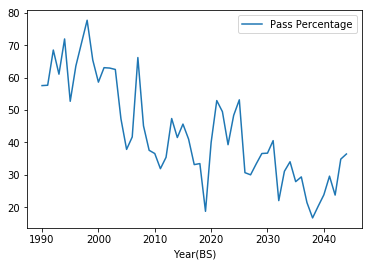

In [29]:
finalfea.plot.line(x= 'Year(BS)',y = 'Pass Percentage')

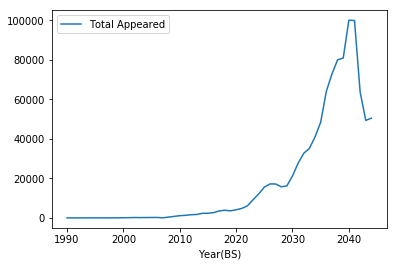

In [30]:
finalfea.plot.line(x= 'Year(BS)',y = 'Total Appeared')

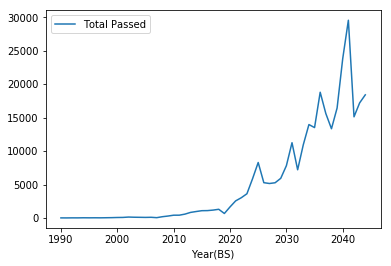

In [35]:
finalfea.plot.line(x= 'Year(BS)',y = 'Total Passed')